# GDP forecasting in Nigeria using Artificial Neural Network

# Preparing the tools
As usual, We are going to use pandas, matplotlib and Numpy for data analysis and manipulation

## Importing Libraries

In [1]:
# Importing all the tools I will need

# Regular EDA and plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

%matplotlib inline 

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#pip install tensorflow

## Load data

In [3]:
data = pd.read_csv("RealGDP.csv")

In [4]:
data.head()

,tyear,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,...,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,TOTAL_GDP,TotalGDPatConstantBasicPrices,NonOilGDPatConstantBasicPrices,NetIndirectTaxesOnProducts,TotalGDPatConstantMarketPrices
0,1981,Annual,2364373.15,1854764.44,341411.50,77897.99,90299.23,6603250.12,NaN,4977416.70,...,3234.81,807075.54,242555.85,110697.65,132700.20,15258004.34,NaN,NaN,NaN,NaN
1,1982,Annual,2425960.89,1897078.85,361115.70,73910.25,93856.08,6272828.03,NaN,4453093.63,...,3252.38,825921.69,248219.81,113282.57,133767.58,14985078.32,NaN,NaN,NaN,NaN
2,1983,Annual,2409081.92,1842704.31,393131.01,75282.78,97963.82,5264881.39,NaN,4052977.68,...,3693.79,844767.84,253883.77,115867.49,125819.69,13849725.17,NaN,NaN,NaN,NaN
3,1984,Annual,2303505.42,1759115.15,399685.38,76694.14,68010.74,5621181.44,NaN,4559196.21,...,3979.28,863613.99,259547.73,118452.41,103092.67,13779255.49,NaN,NaN,NaN,NaN
4,1985,Annual,2731062.47,2180907.71,428102.85,78082.45,43969.46,6379599.38,NaN,4918272.50,...,4624.92,882460.14,265211.69,121037.33,98790.30,14953913.05,NaN,NaN,NaN,NaN


In [5]:
# Making a copy of the data. Hence keeping the original dataframe aside.

df = data.copy()

In [6]:
df.shape

(77, 38)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   tyear                                             77 non-null     int64  
 1   Period                                            77 non-null     object 
 2   Agriculture                                       77 non-null     float64
 3   CropProduction                                    77 non-null     float64
 4   Livestock                                         77 non-null     float64
 5   Forestry                                          77 non-null     float64
 6   Fishing                                           77 non-null     float64
 7   Industry                                          77 non-null     float64
 8   MiningAndQuarrying                                0 non-null      float64
 9   CrudePetroleumAndNatura

In [8]:
df.dropna(axis=1, inplace = True)

In [9]:
df.head()

,tyear,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,CrudePetroleumAndNaturalGas,SolidMinerals,...,ArtsEntertainmentAndRecreation,FinanceAndInsurance,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,TOTAL_GDP
0,1981,Annual,2364373.15,1854764.44,341411.50,77897.99,90299.23,6603250.12,4977416.70,67136.73,...,4561.07,282170.74,1063959.81,421381.98,3234.81,807075.54,242555.85,110697.65,132700.20,15258004.34
1,1982,Annual,2425960.89,1897078.85,361115.70,73910.25,93856.08,6272828.03,4453093.63,54840.50,...,4597.76,372267.76,1074049.33,423670.54,3252.38,825921.69,248219.81,113282.57,133767.58,14985078.32
2,1983,Annual,2409081.92,1842704.31,393131.01,75282.78,97963.82,5264881.39,4052977.68,44014.84,...,4324.58,336896.50,1086703.98,481170.73,3693.79,844767.84,253883.77,115867.49,125819.69,13849725.17
3,1984,Annual,2303505.42,1759115.15,399685.38,76694.14,68010.74,5621181.44,4559196.21,43078.37,...,3543.43,267287.62,1086931.99,518359.90,3979.28,863613.99,259547.73,118452.41,103092.67,13779255.49
4,1985,Annual,2731062.47,2180907.71,428102.85,78082.45,43969.46,6379599.38,4918272.50,44539.09,...,3395.55,254993.44,1091378.22,602464.66,4624.92,882460.14,265211.69,121037.33,98790.30,14953913.05


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   tyear                                             77 non-null     int64  
 1   Period                                            77 non-null     object 
 2   Agriculture                                       77 non-null     float64
 3   CropProduction                                    77 non-null     float64
 4   Livestock                                         77 non-null     float64
 5   Forestry                                          77 non-null     float64
 6   Fishing                                           77 non-null     float64
 7   Industry                                          77 non-null     float64
 8   CrudePetroleumAndNaturalGas                       77 non-null     float64
 9   SolidMinerals          

In [11]:
#Creating the X and y values
X= df.iloc[:,2:-1]
X

,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,CrudePetroleumAndNaturalGas,SolidMinerals,Manufacturing,Construction,...,Utilities,ArtsEntertainmentAndRecreation,FinanceAndInsurance,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices
0,2364373.15,1854764.44,341411.50,77897.99,90299.23,6603250.12,4977416.70,67136.73,1558696.70,851561.61,...,18393.65,4561.07,282170.74,1063959.81,421381.98,3234.81,807075.54,242555.85,110697.65,132700.20
1,2425960.89,1897078.85,361115.70,73910.25,93856.08,6272828.03,4453093.63,54840.50,1764893.89,679200.42,...,17174.34,4597.76,372267.76,1074049.33,423670.54,3252.38,825921.69,248219.81,113282.57,133767.58
2,2409081.92,1842704.31,393131.01,75282.78,97963.82,5264881.39,4052977.68,44014.84,1167888.87,598782.27,...,22263.13,4324.58,336896.50,1086703.98,481170.73,3693.79,844767.84,253883.77,115867.49,125819.69
3,2303505.42,1759115.15,399685.38,76694.14,68010.74,5621181.44,4559196.21,43078.37,1018906.87,488143.29,...,19310.83,3543.43,267287.62,1086931.99,518359.90,3979.28,863613.99,259547.73,118452.41,103092.67
4,2731062.47,2180907.71,428102.85,78082.45,43969.46,6379599.38,4918272.50,44539.09,1416787.79,336270.79,...,15498.05,3395.55,254993.44,1091378.22,602464.66,4624.92,882460.14,265211.69,121037.33,98790.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,4978775.48,4486166.16,341002.97,50038.06,101568.29,3063097.13,1344156.80,32523.95,1686416.37,662431.53,...,127728.46,37338.61,517927.07,1256847.82,706613.23,3937.63,427538.21,478161.40,123769.86,696777.64
73,17544147.74,15786437.68,1208128.04,182747.93,366834.08,12513067.38,5995875.07,96602.02,6420590.28,2605287.77,...,405072.40,156484.02,2094676.55,4471861.75,2544135.68,14440.88,1531581.82,1507561.07,472701.60,2360640.98
74,3597916.08,3144587.69,294971.65,42265.37,116091.37,3135524.31,1514641.29,12421.19,1608461.83,671448.37,...,64825.41,50489.39,527749.58,916064.55,574481.80,3355.32,307550.32,346165.27,112506.18,694742.66
75,3857705.59,3443607.45,283559.35,49559.78,80979.01,3082294.97,1519802.94,24969.86,1537522.17,752833.66,...,117091.44,38677.98,537150.37,1088267.52,602156.45,3392.34,367112.43,300161.48,120126.87,537845.35


In [12]:
y= df.iloc[:,-1:]
y

,TOTAL_GDP
0,15258004.34
1,14985078.32
2,13849725.17
3,13779255.49
4,14953913.05
...,...
72,19041437.59
73,69799941.95
74,16434552.65
75,16931434.89


In [13]:
y = np.ravel(y)

## Split data into train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

## Scaling the data

In [15]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[ 0.73399749,  0.73955329,  0.66774032, ..., -0.00625442,
         0.15032057, -0.08490879],
       [-0.60683625, -0.65130512, -0.08909273, ..., -0.51138033,
        -0.35674927, -0.84958961],
       [-0.69618045, -0.67416882, -0.9121544 , ..., -0.69531863,
        -0.65493796, -0.66417626],
       ...,
       [-0.57338687, -0.62004256, -0.05640836, ..., -0.49430288,
        -0.33238121, -0.84543934],
       [ 1.56360875,  1.55866766,  1.59515713, ...,  0.89041647,
         1.24223072,  0.54200661],
       [-0.41216942, -0.45184341,  0.07970188, ..., -0.39183817,
        -0.18617289, -0.67460622]])

## Building the Model

In [18]:
from tensorflow.keras import layers

In [19]:
# Create the base model:
model = keras.Sequential()

model.add(keras.Input(shape=(25,)))

model.add(layers.Dense(1000, activation="relu")) 

model.add(layers.Dense(1, activation="linear"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              26000     
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 27,001
Trainable params: 27,001
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="mse", metrics= ['mean_absolute_error'])

## Fitting the Model

In [21]:
%reload_ext tensorboard 
import datetime, os

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit(X_train,y_train, batch_size=10, callbacks=[tensorboard_callback], epochs=1000)

Epoch 1/1000
7/7 [==============================] - 6s 105ms/step - loss: 351087370436608.0000 - mean_absolute_error: 14208327.0000
Epoch 2/1000
7/7 [==============================] - 0s 15ms/step - loss: 76756836941824.0000 - mean_absolute_error: 6337697.5000
Epoch 3/1000
7/7 [==============================] - 0s 13ms/step - loss: 25433959563264.0000 - mean_absolute_error: 3904319.7500
Epoch 4/1000
7/7 [==============================] - 0s 12ms/step - loss: 9062549815296.0000 - mean_absolute_error: 2437436.5000
Epoch 5/1000
7/7 [==============================] - 0s 14ms/step - loss: 13022879809536.0000 - mean_absolute_error: 2835453.5000
Epoch 6/1000
7/7 [==============================] - 0s 13ms/step - loss: 4078990786560.0000 - mean_absolute_error: 1530299.7500
Epoch 7/1000
7/7 [==============================] - 0s 15ms/step - loss: 1337127075840.0000 - mean_absolute_error: 934223.9375
Epoch 8/1000
7/7 [==============================] - 0s 12ms/step - loss: 842851942400.0000 - mean_

7/7 [==============================] - 0s 13ms/step - loss: 29355784192.0000 - mean_absolute_error: 126217.6094
Epoch 67/1000
7/7 [==============================] - 0s 14ms/step - loss: 13214943232.0000 - mean_absolute_error: 79902.2109
Epoch 68/1000
7/7 [==============================] - 0s 13ms/step - loss: 59394465792.0000 - mean_absolute_error: 176811.9062
Epoch 69/1000
7/7 [==============================] - 0s 13ms/step - loss: 39663263744.0000 - mean_absolute_error: 124658.9688
Epoch 70/1000
7/7 [==============================] - 0s 39ms/step - loss: 12071042048.0000 - mean_absolute_error: 79400.5703
Epoch 71/1000
7/7 [==============================] - 0s 18ms/step - loss: 83626213376.0000 - mean_absolute_error: 213694.7500
Epoch 72/1000
7/7 [==============================] - 0s 15ms/step - loss: 69107875840.0000 - mean_absolute_error: 202137.3750
Epoch 73/1000
7/7 [==============================] - 0s 15ms/step - loss: 50577055744.0000 - mean_absolute_error: 166819.1875
Epoch 74

7/7 [==============================] - 0s 17ms/step - loss: 14283573248.0000 - mean_absolute_error: 83481.8047
Epoch 132/1000
7/7 [==============================] - 0s 12ms/step - loss: 24008677376.0000 - mean_absolute_error: 112866.6250
Epoch 133/1000
7/7 [==============================] - 0s 14ms/step - loss: 56812646400.0000 - mean_absolute_error: 187200.9531
Epoch 134/1000
7/7 [==============================] - 0s 11ms/step - loss: 49856921600.0000 - mean_absolute_error: 179249.0312
Epoch 135/1000
7/7 [==============================] - 0s 13ms/step - loss: 36797698048.0000 - mean_absolute_error: 154660.2656
Epoch 136/1000
7/7 [==============================] - 0s 12ms/step - loss: 161931722752.0000 - mean_absolute_error: 308115.2500
Epoch 137/1000
7/7 [==============================] - 0s 14ms/step - loss: 264879505408.0000 - mean_absolute_error: 383216.4062
Epoch 138/1000
7/7 [==============================] - 0s 19ms/step - loss: 321016659968.0000 - mean_absolute_error: 443940.96

7/7 [==============================] - 0s 19ms/step - loss: 17246220288.0000 - mean_absolute_error: 93374.6250
Epoch 195/1000
7/7 [==============================] - 0s 23ms/step - loss: 12907371520.0000 - mean_absolute_error: 80226.3281
Epoch 196/1000
7/7 [==============================] - 0s 29ms/step - loss: 4538841088.0000 - mean_absolute_error: 52987.8203
Epoch 197/1000
7/7 [==============================] - 0s 25ms/step - loss: 6308622336.0000 - mean_absolute_error: 53669.3945
Epoch 198/1000
7/7 [==============================] - 0s 35ms/step - loss: 10590018560.0000 - mean_absolute_error: 74371.4062
Epoch 199/1000
7/7 [==============================] - 0s 26ms/step - loss: 5125762560.0000 - mean_absolute_error: 54102.6055
Epoch 200/1000
7/7 [==============================] - 0s 25ms/step - loss: 4563674624.0000 - mean_absolute_error: 51786.1797
Epoch 201/1000
7/7 [==============================] - 0s 27ms/step - loss: 9395854336.0000 - mean_absolute_error: 64045.0156
Epoch 202/10

7/7 [==============================] - 0s 15ms/step - loss: 87251034112.0000 - mean_absolute_error: 225856.0625
Epoch 259/1000
7/7 [==============================] - 0s 15ms/step - loss: 25083353088.0000 - mean_absolute_error: 119800.7891
Epoch 260/1000
7/7 [==============================] - 0s 17ms/step - loss: 11454249984.0000 - mean_absolute_error: 81291.1484
Epoch 261/1000
7/7 [==============================] - 0s 17ms/step - loss: 7592428032.0000 - mean_absolute_error: 65134.3594
Epoch 262/1000
7/7 [==============================] - 0s 20ms/step - loss: 8766348288.0000 - mean_absolute_error: 78287.4609
Epoch 263/1000
7/7 [==============================] - 0s 15ms/step - loss: 6260096512.0000 - mean_absolute_error: 66404.0781
Epoch 264/1000
7/7 [==============================] - 0s 17ms/step - loss: 7989748736.0000 - mean_absolute_error: 68756.1328
Epoch 265/1000
7/7 [==============================] - 0s 19ms/step - loss: 6974216704.0000 - mean_absolute_error: 66622.9844
Epoch 266/

7/7 [==============================] - 0s 16ms/step - loss: 13401600000.0000 - mean_absolute_error: 94813.9844
Epoch 323/1000
7/7 [==============================] - 0s 19ms/step - loss: 9879221248.0000 - mean_absolute_error: 79419.6406
Epoch 324/1000
7/7 [==============================] - 0s 15ms/step - loss: 5329099776.0000 - mean_absolute_error: 53243.0977
Epoch 325/1000
7/7 [==============================] - 0s 17ms/step - loss: 4862880768.0000 - mean_absolute_error: 52243.7539
Epoch 326/1000
7/7 [==============================] - 0s 16ms/step - loss: 9062204416.0000 - mean_absolute_error: 70032.9531
Epoch 327/1000
7/7 [==============================] - 0s 15ms/step - loss: 3049896960.0000 - mean_absolute_error: 40343.0312
Epoch 328/1000
7/7 [==============================] - 0s 18ms/step - loss: 3775954176.0000 - mean_absolute_error: 45366.5586
Epoch 329/1000
7/7 [==============================] - 0s 22ms/step - loss: 3661491200.0000 - mean_absolute_error: 46504.0977
Epoch 330/1000

7/7 [==============================] - 0s 36ms/step - loss: 158998577152.0000 - mean_absolute_error: 263553.0000
Epoch 387/1000
7/7 [==============================] - 0s 18ms/step - loss: 69749817344.0000 - mean_absolute_error: 203418.5625
Epoch 388/1000
7/7 [==============================] - 0s 27ms/step - loss: 65335922688.0000 - mean_absolute_error: 199117.4062
Epoch 389/1000
7/7 [==============================] - 0s 29ms/step - loss: 445215473664.0000 - mean_absolute_error: 494274.2812
Epoch 390/1000
7/7 [==============================] - 0s 14ms/step - loss: 642085421056.0000 - mean_absolute_error: 626742.8750
Epoch 391/1000
7/7 [==============================] - 0s 16ms/step - loss: 140795953152.0000 - mean_absolute_error: 294055.5938
Epoch 392/1000
7/7 [==============================] - 0s 20ms/step - loss: 228027547648.0000 - mean_absolute_error: 360248.4062
Epoch 393/1000
7/7 [==============================] - 0s 21ms/step - loss: 349118169088.0000 - mean_absolute_error: 43139

7/7 [==============================] - 0s 16ms/step - loss: 1739778304.0000 - mean_absolute_error: 31388.4746
Epoch 452/1000
7/7 [==============================] - 0s 19ms/step - loss: 2749310464.0000 - mean_absolute_error: 38915.2969
Epoch 453/1000
7/7 [==============================] - 0s 28ms/step - loss: 5628582400.0000 - mean_absolute_error: 52518.8867
Epoch 454/1000
7/7 [==============================] - 0s 19ms/step - loss: 6807847424.0000 - mean_absolute_error: 60296.4258
Epoch 455/1000
7/7 [==============================] - 0s 26ms/step - loss: 2971627776.0000 - mean_absolute_error: 37762.3281
Epoch 456/1000
7/7 [==============================] - 0s 46ms/step - loss: 2682345472.0000 - mean_absolute_error: 42987.2773
Epoch 457/1000
7/7 [==============================] - 0s 22ms/step - loss: 3530704896.0000 - mean_absolute_error: 43470.9336
Epoch 458/1000
7/7 [==============================] - 0s 19ms/step - loss: 2107866368.0000 - mean_absolute_error: 35610.3281
Epoch 459/1000


7/7 [==============================] - 0s 20ms/step - loss: 2983088640.0000 - mean_absolute_error: 39885.3789
Epoch 517/1000
7/7 [==============================] - 0s 19ms/step - loss: 2054630016.0000 - mean_absolute_error: 32725.1484
Epoch 518/1000
7/7 [==============================] - 0s 15ms/step - loss: 1461977472.0000 - mean_absolute_error: 28424.2305
Epoch 519/1000
7/7 [==============================] - 0s 14ms/step - loss: 1930034560.0000 - mean_absolute_error: 33905.2773
Epoch 520/1000
7/7 [==============================] - 0s 14ms/step - loss: 2818332160.0000 - mean_absolute_error: 40464.1484
Epoch 521/1000
7/7 [==============================] - 0s 16ms/step - loss: 1455508608.0000 - mean_absolute_error: 30345.7695
Epoch 522/1000
7/7 [==============================] - 0s 20ms/step - loss: 1329447552.0000 - mean_absolute_error: 28115.7207
Epoch 523/1000
7/7 [==============================] - 0s 19ms/step - loss: 1666267904.0000 - mean_absolute_error: 29806.0820
Epoch 524/1000


7/7 [==============================] - 0s 18ms/step - loss: 169474342912.0000 - mean_absolute_error: 335669.2188
Epoch 582/1000
7/7 [==============================] - 0s 14ms/step - loss: 169659531264.0000 - mean_absolute_error: 306694.1562
Epoch 583/1000
7/7 [==============================] - 0s 14ms/step - loss: 12570179584.0000 - mean_absolute_error: 85417.6875
Epoch 584/1000
7/7 [==============================] - 0s 14ms/step - loss: 9726605312.0000 - mean_absolute_error: 67945.6719
Epoch 585/1000
7/7 [==============================] - 0s 17ms/step - loss: 18275221504.0000 - mean_absolute_error: 104792.0000
Epoch 586/1000
7/7 [==============================] - 0s 14ms/step - loss: 92210135040.0000 - mean_absolute_error: 214701.0156
Epoch 587/1000
7/7 [==============================] - 0s 17ms/step - loss: 188215001088.0000 - mean_absolute_error: 305866.0938
Epoch 588/1000
7/7 [==============================] - 0s 17ms/step - loss: 322943221760.0000 - mean_absolute_error: 423923.031

7/7 [==============================] - 0s 19ms/step - loss: 14672815104.0000 - mean_absolute_error: 87770.6875
Epoch 646/1000
7/7 [==============================] - 0s 18ms/step - loss: 20747538432.0000 - mean_absolute_error: 103846.8359
Epoch 647/1000
7/7 [==============================] - 0s 17ms/step - loss: 14591322112.0000 - mean_absolute_error: 87652.4453
Epoch 648/1000
7/7 [==============================] - 0s 16ms/step - loss: 11937277952.0000 - mean_absolute_error: 80594.8672
Epoch 649/1000
7/7 [==============================] - 0s 14ms/step - loss: 12349248512.0000 - mean_absolute_error: 80608.5234
Epoch 650/1000
7/7 [==============================] - 0s 17ms/step - loss: 19333408768.0000 - mean_absolute_error: 99778.0625
Epoch 651/1000
7/7 [==============================] - 0s 20ms/step - loss: 15741111296.0000 - mean_absolute_error: 86286.3594
Epoch 652/1000
7/7 [==============================] - 0s 16ms/step - loss: 50130214912.0000 - mean_absolute_error: 151743.7344
Epoch

7/7 [==============================] - 0s 14ms/step - loss: 2181072384.0000 - mean_absolute_error: 32719.5410
Epoch 711/1000
7/7 [==============================] - 0s 16ms/step - loss: 2168063488.0000 - mean_absolute_error: 35997.2969
Epoch 712/1000
7/7 [==============================] - 0s 13ms/step - loss: 2383615744.0000 - mean_absolute_error: 38282.1797
Epoch 713/1000
7/7 [==============================] - 0s 15ms/step - loss: 5152592896.0000 - mean_absolute_error: 49076.7852
Epoch 714/1000
7/7 [==============================] - 0s 14ms/step - loss: 2545547264.0000 - mean_absolute_error: 37862.5742
Epoch 715/1000
7/7 [==============================] - 0s 13ms/step - loss: 7051425280.0000 - mean_absolute_error: 57088.0156
Epoch 716/1000
7/7 [==============================] - 0s 14ms/step - loss: 7282976768.0000 - mean_absolute_error: 66999.2812
Epoch 717/1000
7/7 [==============================] - 0s 11ms/step - loss: 3715485952.0000 - mean_absolute_error: 47000.2773
Epoch 718/1000


7/7 [==============================] - 0s 20ms/step - loss: 1432279296.0000 - mean_absolute_error: 26418.1641
Epoch 776/1000
7/7 [==============================] - 0s 13ms/step - loss: 35826438144.0000 - mean_absolute_error: 149206.4062
Epoch 777/1000
7/7 [==============================] - 0s 30ms/step - loss: 13952161792.0000 - mean_absolute_error: 85577.4922
Epoch 778/1000
7/7 [==============================] - 1s 91ms/step - loss: 18966487040.0000 - mean_absolute_error: 104690.6406
Epoch 779/1000
7/7 [==============================] - 0s 49ms/step - loss: 5641086464.0000 - mean_absolute_error: 54227.0312
Epoch 780/1000
7/7 [==============================] - 1s 90ms/step - loss: 8565355008.0000 - mean_absolute_error: 71374.2812
Epoch 781/1000
7/7 [==============================] - 1s 80ms/step - loss: 5591174144.0000 - mean_absolute_error: 49715.4258
Epoch 782/1000
7/7 [==============================] - 1s 119ms/step - loss: 1328590080.0000 - mean_absolute_error: 27194.5078
Epoch 783

7/7 [==============================] - 0s 15ms/step - loss: 133896814592.0000 - mean_absolute_error: 270474.5312
Epoch 841/1000
7/7 [==============================] - 0s 13ms/step - loss: 308886470656.0000 - mean_absolute_error: 465414.4062
Epoch 842/1000
7/7 [==============================] - 0s 11ms/step - loss: 158172397568.0000 - mean_absolute_error: 306301.4375
Epoch 843/1000
7/7 [==============================] - 0s 14ms/step - loss: 22832392192.0000 - mean_absolute_error: 106377.9219
Epoch 844/1000
7/7 [==============================] - 0s 12ms/step - loss: 4728843264.0000 - mean_absolute_error: 52862.4414
Epoch 845/1000
7/7 [==============================] - 0s 12ms/step - loss: 6076976640.0000 - mean_absolute_error: 61146.5391
Epoch 846/1000
7/7 [==============================] - 0s 40ms/step - loss: 5570031104.0000 - mean_absolute_error: 57741.7695
Epoch 847/1000
7/7 [==============================] - 0s 19ms/step - loss: 6614509568.0000 - mean_absolute_error: 62196.4258
Epoc

7/7 [==============================] - 0s 19ms/step - loss: 19950815232.0000 - mean_absolute_error: 108983.3438
Epoch 905/1000
7/7 [==============================] - 0s 17ms/step - loss: 1472284416.0000 - mean_absolute_error: 29309.8848
Epoch 906/1000
7/7 [==============================] - 0s 16ms/step - loss: 1451693568.0000 - mean_absolute_error: 28539.6719
Epoch 907/1000
7/7 [==============================] - 0s 21ms/step - loss: 904227968.0000 - mean_absolute_error: 23115.4258
Epoch 908/1000
7/7 [==============================] - 0s 19ms/step - loss: 792495360.0000 - mean_absolute_error: 21025.7207
Epoch 909/1000
7/7 [==============================] - 0s 26ms/step - loss: 1597336064.0000 - mean_absolute_error: 33262.1641
Epoch 910/1000
7/7 [==============================] - 0s 24ms/step - loss: 5775371776.0000 - mean_absolute_error: 53070.5742
Epoch 911/1000
7/7 [==============================] - 0s 45ms/step - loss: 6026907136.0000 - mean_absolute_error: 59194.3125
Epoch 912/1000


7/7 [==============================] - 0s 17ms/step - loss: 26911365120.0000 - mean_absolute_error: 128166.1641
Epoch 970/1000
7/7 [==============================] - 0s 21ms/step - loss: 95091974144.0000 - mean_absolute_error: 233899.5156
Epoch 971/1000
7/7 [==============================] - 0s 15ms/step - loss: 89934323712.0000 - mean_absolute_error: 237257.0000
Epoch 972/1000
7/7 [==============================] - 0s 15ms/step - loss: 56329867264.0000 - mean_absolute_error: 180312.6562
Epoch 973/1000
7/7 [==============================] - 0s 17ms/step - loss: 30485846016.0000 - mean_absolute_error: 130194.5547
Epoch 974/1000
7/7 [==============================] - 0s 21ms/step - loss: 36397928448.0000 - mean_absolute_error: 147702.1562
Epoch 975/1000
7/7 [==============================] - 0s 18ms/step - loss: 44371976192.0000 - mean_absolute_error: 160296.6562
Epoch 976/1000
7/7 [==============================] - 0s 23ms/step - loss: 184579063808.0000 - mean_absolute_error: 335823.343

C:\Users\ezias\AppData\Local\Temp\ipykernel_19136\3008021844.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


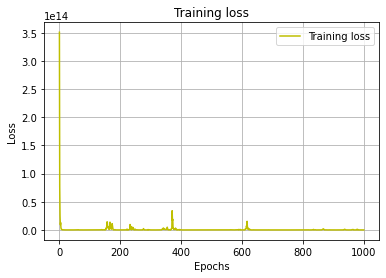

In [22]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(b=None)
plt.legend()
plt.show()


C:\Users\ezias\AppData\Local\Temp\ipykernel_19136\3330127693.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


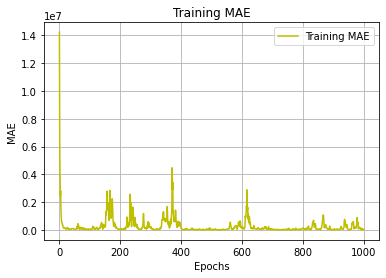

In [23]:

acc = history.history['mean_absolute_error']
#val_acc = history.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
#plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.grid(b=None)
plt.legend()
plt.show()

In [24]:
#Predict on test data
predictions = model.predict(X_test)
print("Predicted values are: ", predictions)
print("Real values are: ", y_test)

1/1 [==============================] - 0s 247ms/step
Predicted values are:  [[18291584.]
 [14875175.]
 [16162610.]
 [16188555.]
 [19177500.]
 [15691549.]
 [15209777.]
 [14383201.]
 [29228134.]
 [15347152.]
 [17032732.]
 [20012844.]
 [57739620.]
 [18674212.]
 [13870396.]
 [68285144.]]
Real values are:  [18150356.45 14819619.26 16045904.51 16096654.19 19041437.59 15645434.73
 15258004.34 14304438.44 28957710.24 15237987.29 16931434.89 19927993.25
 57511041.77 18533752.07 13849725.17 67931235.93]


In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,epoch
995,2.939016e+09,37515.328125,995
996,1.063655e+09,26567.525391,996
997,5.472934e+09,57923.066406,997
998,4.121545e+09,44667.949219,998
999,4.983201e+09,54877.425781,999


In [26]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test mae:', score[1])

Test loss: 23401584640.0
Test mae: 126493.9375


## MAE, MSE and RMSE Value

In [28]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

126494.34749999957
23401776027.249947
152976.3904243068


In [29]:
#Comparing the results of both the Artificial neural network and the ARIMA Model
data_ARIMA = pd.read_csv("ARIMA.csv")

In [30]:
data_ARIMA

,Unnamed: 0,MAE,MSE,RMSE
0,ANN,9.946240e+04,1.829016e+10,135241.114
1,ARIMA,1.402092e+06,2.929480e+12,1711571.762


In [31]:
data_ARIMA = data_ARIMA.rename(columns={'Unnamed: 0': 'model'})

In [32]:
data_ARIMA

,model,MAE,MSE,RMSE
0,ANN,9.946240e+04,1.829016e+10,135241.114
1,ARIMA,1.402092e+06,2.929480e+12,1711571.762


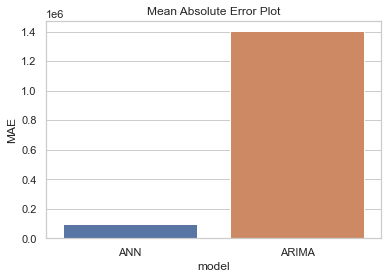

In [33]:
sns.set_theme(style="whitegrid")
sns.barplot(x="model", y="MAE", data=data_ARIMA)
plt.title('Mean Absolute Error Plot')
plt.show()

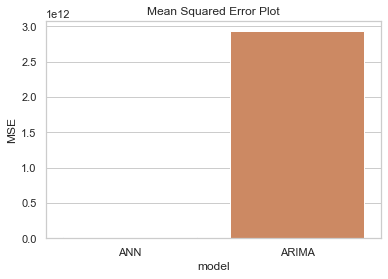

In [34]:
sns.barplot(x="model", y="MSE", data=data_ARIMA)
plt.title('Mean Squared Error Plot')
plt.show()

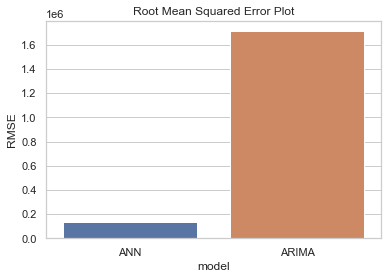

In [35]:
sns.barplot(x="model", y="RMSE", data=data_ARIMA)
plt.title('Root Mean Squared Error Plot')
plt.show()

In [36]:
df_AA = pd.read_csv("ANNARIMA.csv")

In [37]:
df_AA.head()

,Model,T1,T2,T3,T4,T5,T6
0,Predicted Values ANN,18161584.00,14864842.00,16094115.00,16021607.00,19076654.00,15652445.00
1,Actual Values ANN,18150356.45,14819619.26,16045904.51,16096654.19,19041437.59,15645434.73
2,Predicted Values ARIMA,16914122.13,15876428.62,67943615.98,18520996.19,16708371.84,16885310.40
3,Actual Values ARIMA,17555441.69,18213537.29,67931235.93,15797965.83,16334719.27,17760228.17


In [38]:
df_AA_ANN = df_AA.iloc[:-2,:]
df_AA_ANN

,Model,T1,T2,T3,T4,T5,T6
0,Predicted Values ANN,18161584.00,14864842.00,16094115.00,16021607.00,19076654.00,15652445.00
1,Actual Values ANN,18150356.45,14819619.26,16045904.51,16096654.19,19041437.59,15645434.73


In [39]:
df_AA_ANN 

,Model,T1,T2,T3,T4,T5,T6
0,Predicted Values ANN,18161584.00,14864842.00,16094115.00,16021607.00,19076654.00,15652445.00
1,Actual Values ANN,18150356.45,14819619.26,16045904.51,16096654.19,19041437.59,15645434.73


In [42]:
#pip install shap

Note: you may need to restart the kernel to use updated packages.


In [43]:
import shap

In [44]:
explainer = shap.KernelExplainer(model.predict,X_train)

2/2 [==============================] - 0s 16ms/step


In [45]:
shap_values = explainer.shap_values(X_test,nsamples=100)

  0%|          | 0/16 [00:00<?, ?it/s]

191/191 [==============================] - 0s 1ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 31ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 22ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


191/191 [==============================] - 0s 1ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 11ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 19ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 31ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 21ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 20ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 11ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 16ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 16ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 19ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 20ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


1/1 [==============================] - 0s 16ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


191/191 [==============================] - 0s 1ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


In [46]:
df.columns

Index(['tyear', 'Period', 'Agriculture', 'CropProduction', 'Livestock',
       'Forestry', 'Fishing', 'Industry', 'CrudePetroleumAndNaturalGas',
       'SolidMinerals', 'Manufacturing', 'Construction', 'Services', 'Trade',
       'AccommodationAndFoodServices', 'Transport',
       'InformationAndCommunication', 'Utilities',
       'ArtsEntertainmentAndRecreation', 'FinanceAndInsurance', 'RealEstate',
       'ProfessionalScientificAndTechnicalServices',
       'AdministrativeAndSupportServicesBusinessServices',
       'PublicAdministration', 'Education', 'HumanHealthAndSocialServices',
       'OtherServices', 'TOTAL_GDP'],
      dtype='object')

In [47]:
features = ['tyear', 'Period', 'Agriculture', 'CropProduction', 'Livestock',
       'Forestry', 'Fishing', 'Industry', 'CrudePetroleumAndNaturalGas',
       'SolidMinerals', 'Manufacturing', 'Construction', 'Services', 'Trade',
       'AccommodationAndFoodServices', 'Transport',
       'InformationAndCommunication', 'Utilities',
       'ArtsEntertainmentAndRecreation', 'FinanceAndInsurance', 'RealEstate',
       'ProfessionalScientificAndTechnicalServices',
       'AdministrativeAndSupportServicesBusinessServices',
       'PublicAdministration', 'Education', 'HumanHealthAndSocialServices',
       'OtherServices', 'TOTAL_GDP']

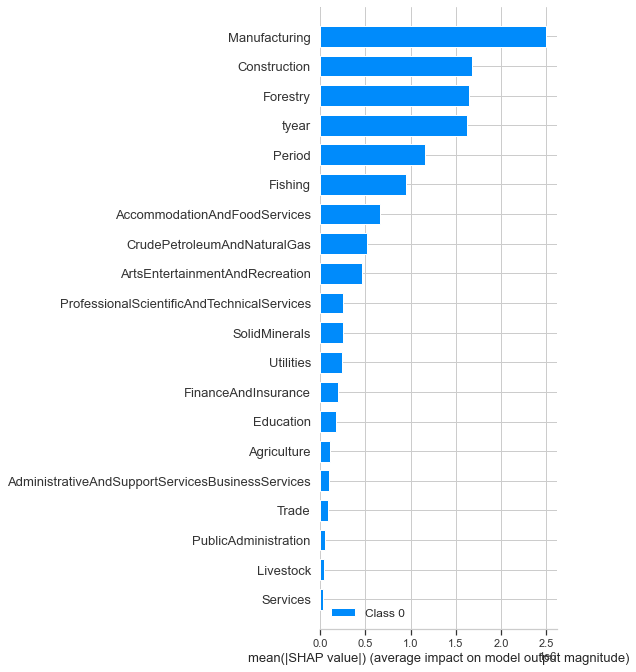

In [48]:
shap.summary_plot(shap_values,X_test,feature_names=features)